In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# Define the model function with two inputs x1 and x2
def model(inputs, w1, w2, w3, w4, beta):
    x1, x2 = inputs
    return w1 * x1**w2 + w3 * x2**w4 + beta

In [3]:
# Generate some synthetic data for x1 and x2
x1_data = np.linspace(1, 10, 50)
x2_data = np.linspace(1, 10, 50)
x1_data, x2_data = np.meshgrid(x1_data, x2_data)

# Flatten the meshgrid arrays and combine into a tuple
x1_flat = x1_data.flatten()
x2_flat = x2_data.flatten()
inputs = (x1_flat, x2_flat)

# Define the true parameters for the synthetic data
true_params = [2, 3, 4, 0.5, 5]

# Generate the y_data with some noise
y_data = model(inputs, *true_params) + np.random.normal(0, 1, x1_flat.size)

In [4]:
# Fit the model to the data
popt, pcov = curve_fit(model, inputs, y_data, maxfev=5000)
w1, w2, w3, w4, beta = popt
print("Optimized parameters (popt):", popt)

Optimized parameters (popt): [1.99972677 3.00003434 4.10147326 0.49148832 4.90750822]


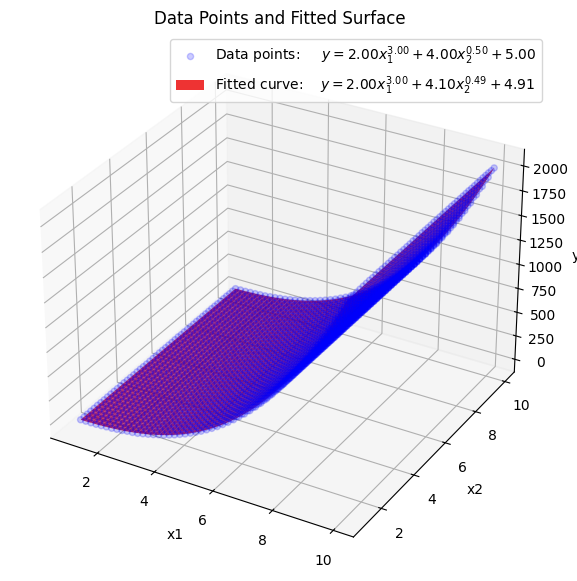

In [5]:
# Generate fitted data using the optimized parameters
y_fitted = model((x1_flat, x2_flat), *popt)
y_fitted = y_fitted.reshape(x1_data.shape)  # Reshape to match the meshgrid shape

# Create the formula string with LaTeX formatting for the legend
fitted_formula = f'$y = {w1:.2f} x_1^{{{w2:.2f}}} + {w3:.2f} x_2^{{{w4:.2f}}} + {beta:.2f}$'
true_formula = f'$y = {true_params[0]:.2f} x_1^{{{true_params[1]:.2f}}} + {true_params[2]:.2f} x_2^{{{true_params[3]:.2f}}} + {true_params[4]:.2f}$'

# Plot the data points and the fitted surface in one plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x1_flat, x2_flat, y_data, c='blue', marker='o', alpha=0.2, label=f'Data points:\t {true_formula}')

# Plot the fitted surface
ax.plot_surface(x1_data, x2_data, y_fitted, color='red', alpha=0.8, label=f'Fitted curve:\t {fitted_formula}')

# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Data Points and Fitted Surface')

# Add legend
ax.legend()

# save plot
plt.savefig("figs/two_feature.png")

plt.show()